In [1]:
import numpy as np
from matplotlib import pyplot as plt

from ImpactAtmosphere import EvolveAtm as ev
from ImpactAtmosphere import SteamAtm

from photochem import Atmosphere, zahnle_earth, utils, io
from photochem.utils._format import yaml, Loader, Dumper

import impact_simulations as imp

In [2]:
params_l = imp.Ceres_rain()
params = imp.Ceres_nominal()

In [3]:
pc = Atmosphere(zahnle_earth,\
                params['outfile']+"_settings.yaml",\
                "input/Sun_4.0Ga.txt",\
                params['outfile']+"_atmosphere.txt")

pc_l = Atmosphere(zahnle_earth,\
                params_l['outfile']+"_settings.yaml",\
                "input/Sun_4.0Ga.txt",\
                params_l['outfile']+"_atmosphere.txt")

In [19]:
sol1 = io.read_evolve_output(params['outfile']+".dat")
sol_pc = io.reformat_output_dict(sol1)

sol1_l = io.read_evolve_output(params_l['outfile']+".dat")
sol_pc_l = io.reformat_output_dict(sol1_l)

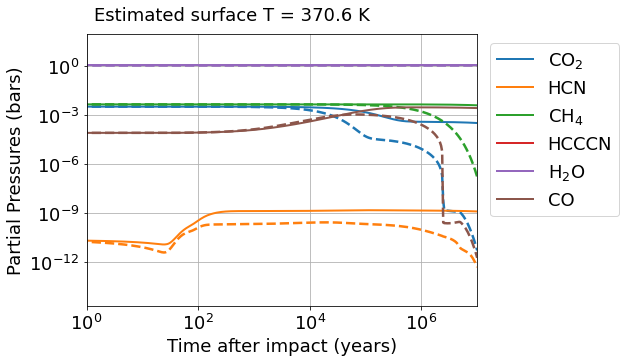

In [21]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[7,5])

yr = 365*24*60*60
specs = ['CO2','HCN','CH4','HCCCN','H2O','CO']
labels = ['CO$_2$','HCN','CH$_4$','HCCCN','H$_2$O','CO']
for i,sp in enumerate(specs):
    ax.plot(sol_pc['time']/yr,(pc.wrk.pressure[0]/1e6)*sol_pc[sp][0,:],lw=2, c='C'+str(i),label=labels[i])
    
    ax.plot(sol_pc_l['time']/yr,(pc_l.wrk.pressure[0]/1e6)*sol_pc_l[sp][0,:],lw=2.5,c='C'+str(i),ls='--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
ax.set_ylim(2e-15,1e2)
ax.set_xlim(1,1e7)
ax.set_xlabel('Time after impact (years)')
ax.set_ylabel('Partial Pressures (bars)')
ax.grid()
ax.text(0.02, 1.05, 'Estimated surface T = %.1f K'%pc.var.temperature[0], \
        transform=ax.transAxes,ha='left',)

# plt.savefig("figures/nominal_Ceres.pdf",bbox_inches='tight')

plt.show()

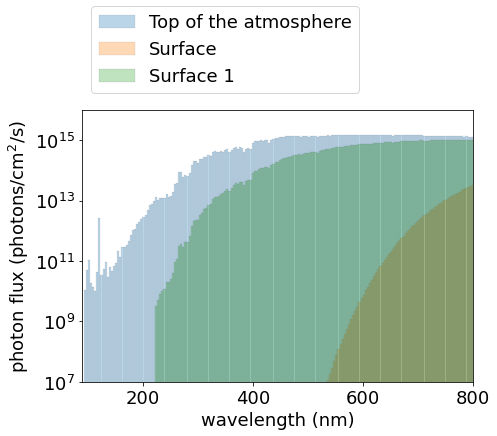

In [22]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[7,5])
fig.patch.set_facecolor("w")

time = 1e4

j = np.argmin(np.abs(sol_pc['time']/yr-time))
pc.prep_atmosphere(sol1['usol'][:,:,j])
color = 'k'
lw = 0.2
ax.bar(pc.dat.wavl[:-1],pc.var.photon_flux, \
       width=(pc.dat.wavl[1:]-pc.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Top of the atmosphere')
ax.bar(pc.dat.wavl[:-1],pc.var.photon_flux*pc.wrk.surf_radiance, \
       width=(pc.dat.wavl[1:]-pc.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Surface')

j = np.argmin(np.abs(sol_pc_l['time']/yr-time))
pc_l.prep_atmosphere(sol1_l['usol'][:,:,j])
color = 'k'
lw = 0.2
ax.bar(pc_l.dat.wavl[:-1],pc_l.var.photon_flux*pc_l.wrk.surf_radiance, \
       width=(pc_l.dat.wavl[1:]-pc_l.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Surface 1')

ax.set_yscale('log')
ax.set_ylim(1e7,1e16)
ax.set_xlim(90,800)
ax.set_xlabel('wavelength (nm)')
ax.legend(loc='lower left',bbox_to_anchor=(0, 1.03))
ax.set_ylabel('photon flux (photons/cm$^2$/s)')

plt.show()

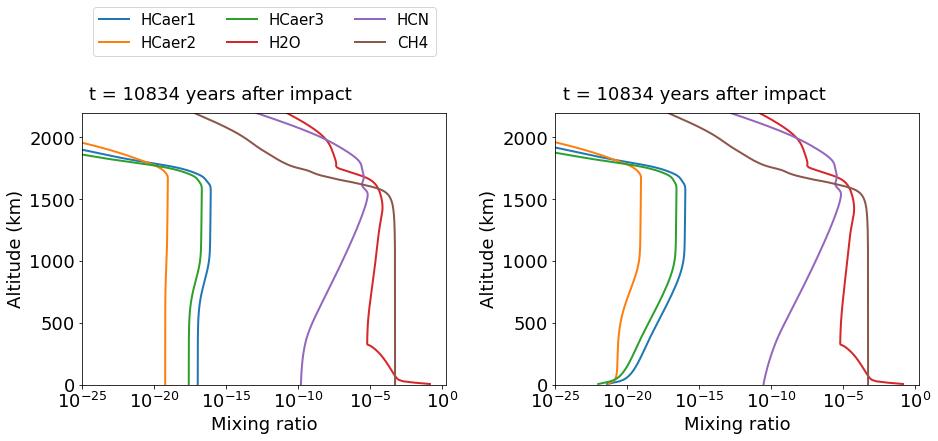

In [25]:



plt.rcParams.update({'font.size': 18})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[15,5])
fig.patch.set_facecolor("w")

time = 1e4
species = ['HCaer1','HCaer2','HCaer3','H2O','HCN','CH4']

j = np.argmin(np.abs(sol_pc['time']/yr-time))
pc.prep_atmosphere(sol1['usol'][:,:,j])
species_names = pc.dat.species_names

for i,spec in enumerate(species):
    ind = species_names.index(spec)
    mix = pc.wrk.densities[ind,:]/pc.wrk.density
    ax.plot(mix,sol_pc['alt'],lw=2,label=spec)
ax.legend(ncol=3,bbox_to_anchor=(0.5, 1.3), loc='center',fontsize=15)
ax.set_xscale('log')
ax.set_xlim(1e-25,2)
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Mixing ratio')
ax.text(0.02, 1.05, 't = '+'%i'%(1009+sol_pc['time'][j]/yr)+' years after impact', transform=ax.transAxes,ha='left')
ax.set_ylim(0,sol_pc['alt'][-1])

j = np.argmin(np.abs(sol_pc_l['time']/yr-time))
pc_l.prep_atmosphere(sol1_l['usol'][:,:,j])
species_names = pc_l.dat.species_names

for i,spec in enumerate(species):
    ind = species_names.index(spec)
    mix = pc_l.wrk.densities[ind,:]/pc_l.wrk.density
    ax1.plot(mix,sol_pc_l['alt'],lw=2,label=spec)

ax1.set_xscale('log')
ax1.set_xlim(1e-25,2)
ax1.set_ylabel('Altitude (km)')
ax1.set_xlabel('Mixing ratio')
ax1.text(0.02, 1.05, 't = '+'%i'%(1009+sol_pc['time'][j]/yr)+' years after impact', transform=ax1.transAxes,ha='left')
ax1.set_ylim(0,sol_pc['alt'][-1])



plt.subplots_adjust(wspace=.3)
plt.show()


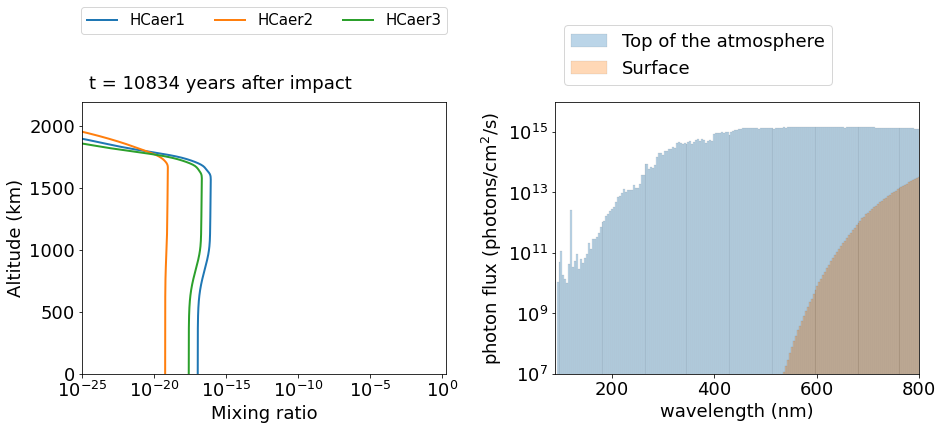

In [11]:
yr = 365*24*60*60
time = 1e4
j = np.argmin(np.abs(sol_pc['time']/yr-time))
pc.prep_atmosphere(sol1['usol'][:,:,j])

plt.rcParams.update({'font.size': 18})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[15,5])
fig.patch.set_facecolor("w")
yr = 365*24*60*60

species_names = pc.dat.species_names

species = ['HCaer1','HCaer2','HCaer3']

for i,spec in enumerate(species):
    ind = species_names.index(spec)
    mix = pc.wrk.densities[ind,:]/pc.wrk.density
    ax.plot(mix,sol_pc['alt'],lw=2,label=spec)

ax.legend(ncol=3,bbox_to_anchor=(0.5, 1.3), loc='center',fontsize=15)
ax.set_xscale('log')
ax.set_xlim(1e-25,2)
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Mixing ratio')
ax.text(0.02, 1.05, 't = '+'%i'%(1009+sol_pc['time'][j]/yr)+' years after impact', transform=ax.transAxes,ha='left')
ax.set_ylim(0,sol_pc['alt'][-1])

color = 'k'
lw = 0.2
ax1.bar(pc.dat.wavl[:-1],pc.var.photon_flux, \
       width=(pc.dat.wavl[1:]-pc.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Top of the atmosphere')
ax1.bar(pc.dat.wavl[:-1],pc.var.photon_flux*pc.wrk.surf_radiance, \
       width=(pc.dat.wavl[1:]-pc.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Surface')
ax1.set_yscale('log')
ax1.set_ylim(1e7,1e16)
ax1.set_xlim(90,800)
ax1.set_xlabel('wavelength (nm)')
ax1.legend(loc='lower left',bbox_to_anchor=(0, 1.03))
ax1.set_ylabel('photon flux (photons/cm$^2$/s)')

# ax.set_facecolor('#9BAFB5')
# ax1.set_facecolor('#9BAFB5')

plt.subplots_adjust(wspace=.3)
# plt.savefig("Dimitar/10000_years.pdf",bbox_inches='tight')
plt.show()
#     plt.close()

# Nominal Ceres (1000 km impact)

In [26]:
N_H2O_ocean = 15.0e3 # moles/cm2 (15e3 is 1 ocean)
N_CO2 = 23.*0.1  # moles/cm2 (23 is "one bar" of CO2)
N_N2  = 36. # moles/cm2 (36 is "one bar" of N2)
M_i = 2.000e24 # impactor mass in grams (2.589e23 g = 500 km, about Vesta)

stm = SteamAtm('zahnle_earth_ct.yaml')
file = "results/CO2=2.3e0_N2=3.6e1_M_i=2.0e24_eddy=1e6"

# model steam atmosphere
sol_stm = stm.impact(N_H2O_ocean,N_CO2,N_N2,M_i)

# 0-D model
init_atm = stm.init_for_integrate(sol_stm)
sol_atm = ev.integrate(init_atm,rtol=1e-9)

yr = 365*24*60*60
ind = np.argmin(np.abs(sol_atm['H2']*sol_atm['Ntot']/(sol_atm['H2'][0]*sol_atm['Ntot'][0]) - 0.1))
print("timescale of hydrogen escape =",'%.2f'%(sol_atm['time'][ind]/yr/1e6),'Myrs')

Integration successful.                 
timescale of hydrogen escape = 12.35 Myrs


In [27]:
pc = Atmosphere(zahnle_earth,\
                file+"_settings.yaml",\
                "input/Sun_4.0Ga.txt",\
                file+"_atmosphere.txt")

In [38]:
sol1 = io.read_evolve_output(file+".dat")
sol_pc = io.reformat_output_dict(sol1)

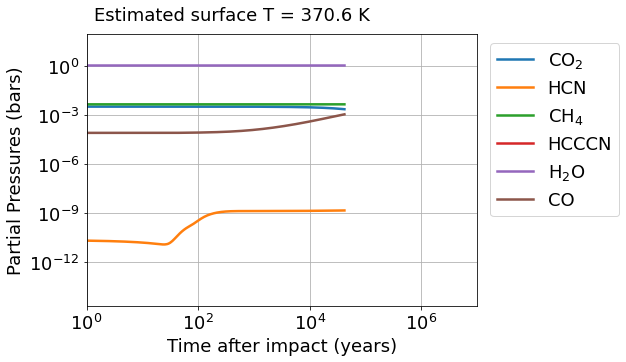

In [39]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[7,5])

yr = 365*24*60*60
specs = ['CO2','HCN','CH4','HCCCN','H2O','CO']
labels = ['CO$_2$','HCN','CH$_4$','HCCCN','H$_2$O','CO']
for i,sp in enumerate(specs):
    ax.plot(sol_pc['time']/yr,(pc.wrk.pressure[0]/1e6)*sol_pc[sp][0,:],lw=2.5,label=labels[i])

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
ax.set_ylim(2e-15,1e2)
ax.set_xlim(1,1e7)
ax.set_xlabel('Time after impact (years)')
ax.set_ylabel('Partial Pressures (bars)')
ax.grid()
ax.text(0.02, 1.05, 'Estimated surface T = %.1f K'%pc.var.temperature[0], \
        transform=ax.transAxes,ha='left',)

# plt.savefig("figures/nominal_Ceres.pdf",bbox_inches='tight')

plt.show()

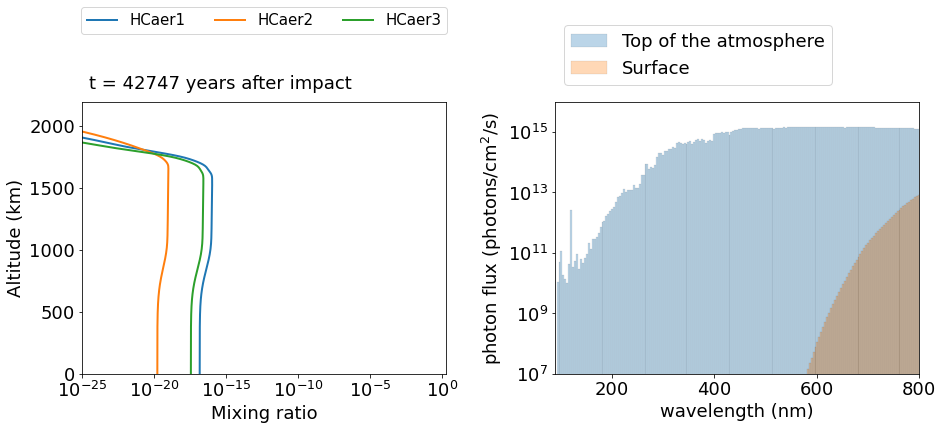

In [40]:
yr = 365*24*60*60
time = 1e5
j = np.argmin(np.abs(sol_pc['time']/yr-time))
pc.prep_atmosphere(sol1['usol'][:,:,j])

plt.rcParams.update({'font.size': 18})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[15,5])
fig.patch.set_facecolor("w")
yr = 365*24*60*60

species_names = pc.dat.species_names

species = ['HCaer1','HCaer2','HCaer3']

for i,spec in enumerate(species):
    ind = species_names.index(spec)
    mix = pc.wrk.densities[ind,:]/pc.wrk.density
    ax.plot(mix,sol_pc['alt'],lw=2,label=spec)

ax.legend(ncol=3,bbox_to_anchor=(0.5, 1.3), loc='center',fontsize=15)
ax.set_xscale('log')
ax.set_xlim(1e-25,2)
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Mixing ratio')
ax.text(0.02, 1.05, 't = '+'%i'%(1009+sol_pc['time'][j]/yr)+' years after impact', transform=ax.transAxes,ha='left')
ax.set_ylim(0,sol_pc['alt'][-1])

color = 'k'
lw = 0.2
ax1.bar(pc.dat.wavl[:-1],pc.var.photon_flux, \
       width=(pc.dat.wavl[1:]-pc.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Top of the atmosphere')
ax1.bar(pc.dat.wavl[:-1],pc.var.photon_flux*pc.wrk.surf_radiance, \
       width=(pc.dat.wavl[1:]-pc.dat.wavl[:-1]),alpha=.3,align='edge',ec=color,lw=lw,label='Surface')
ax1.set_yscale('log')
ax1.set_ylim(1e7,1e16)
ax1.set_xlim(90,800)
ax1.set_xlabel('wavelength (nm)')
ax1.legend(loc='lower left',bbox_to_anchor=(0, 1.03))
ax1.set_ylabel('photon flux (photons/cm$^2$/s)')

# ax.set_facecolor('#9BAFB5')
# ax1.set_facecolor('#9BAFB5')

plt.subplots_adjust(wspace=.3)
# plt.savefig("Dimitar/10000_years.pdf",bbox_inches='tight')
plt.show()
#     plt.close()

# Nominal Vesta (500 km impact)

In [9]:
N_H2O_ocean = 15.0e3 # moles/cm2 (15e3 is 1 ocean)
N_CO2 = 23.*0.1  # moles/cm2 (23 is "one bar" of CO2)
N_N2  = 36. # moles/cm2 (36 is "one bar" of N2)
M_i = 2.589e23 # impactor mass in grams (2.589e23 g = 500 km, about Vesta)

stm = SteamAtm('zahnle_earth_ct.yaml')
file = "CO2=2.3e0/CO2=2.3e0_N2=3.6e1_M_i=2.589e23_eddy=1e6"

# model steam atmosphere
sol_stm = stm.impact(N_H2O_ocean,N_CO2,N_N2,M_i)

# 0-D model
init_atm = stm.init_for_integrate(sol_stm)
sol_atm = ev.integrate(init_atm,rtol=1e-9)

yr = 365*24*60*60
ind = np.argmin(np.abs(sol_atm['H2']*sol_atm['Ntot']/(sol_atm['H2'][0]*sol_atm['Ntot'][0]) - 0.1))
print("timescale of hydrogen escape =",'%.2f'%(sol_atm['time'][ind]/yr/1e6),'Myrs')

Integration successful.                 
timescale of hydrogen escape = 1.72 Myrs


In [10]:
pc = Atmosphere(zahnle_earth,\
                file+"_settings.yaml",\
                "input/Sun_4.0Ga.txt",\
                file+"_atmosphere.txt")

In [11]:
sol1 = io.read_evolve_output(file+".dat")
sol_pc = io.reformat_output_dict(sol1)

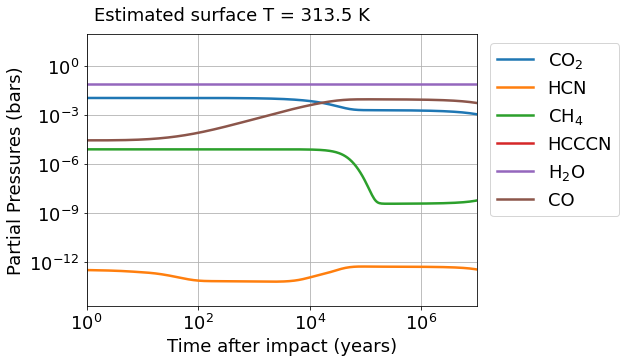

In [12]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[7,5])

yr = 365*24*60*60
specs = ['CO2','HCN','CH4','HCCCN','H2O','CO']
labels = ['CO$_2$','HCN','CH$_4$','HCCCN','H$_2$O','CO']
for i,sp in enumerate(specs):
    ax.plot(sol_pc['time']/yr,(pc.wrk.pressure[0]/1e6)*sol_pc[sp][0,:],lw=2.5,label=labels[i])

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
ax.set_ylim(2e-15,1e2)
ax.set_xlim(1,1e7)
ax.set_xlabel('Time after impact (years)')
ax.set_ylabel('Partial Pressures (bars)')
ax.grid()
ax.text(0.02, 1.05, 'Estimated surface T = %.1f K'%pc.var.temperature[0], \
        transform=ax.transAxes,ha='left',)

# plt.savefig("figures/nominal_Vesta.pdf",bbox_inches='tight')

plt.show()

In [14]:
file = 'results/nominal_Vesta.csvy'
T = pc.var.temperature[0]
P = pc.wrk.pressure[0]/1e6
meta = {}
meta['mass-impactor-grams'] = 2.589e23
meta['preimpact-H2O-oceans'] = 1
meta['preimpact-CO2-bars'] = 0.1
meta['preimpact-N2-bars'] = 1
meta['Fe-react-fract'] = 1
meta['estimated-surface-temperature-kelvin'] = float(T)

write_yaml_csv(sol_pc, meta, T, P, file)